In [136]:
#Detect duplicated data

#Import the libraries I'll be using
import pandas as pd

#Read in the data file
df = pd.read_csv('medical_raw_data.csv')

#Return the count of duplicated values as booleans
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

                    Missing Count  Missing Percent
Unnamed: 0                      0             0.00
CaseOrder                       0             0.00
Customer_id                     0             0.00
Interaction                     0             0.00
UID                             0             0.00
City                            0             0.00
State                           0             0.00
County                          0             0.00
Zip                             0             0.00
Lat                             0             0.00
Lng                             0             0.00
Population                      0             0.00
Area                            0             0.00
Timezone                        0             0.00
Job                             0             0.00
Children                     2588            25.88
Age                          2414            24.14
Education                       0             0.00
Employment                     

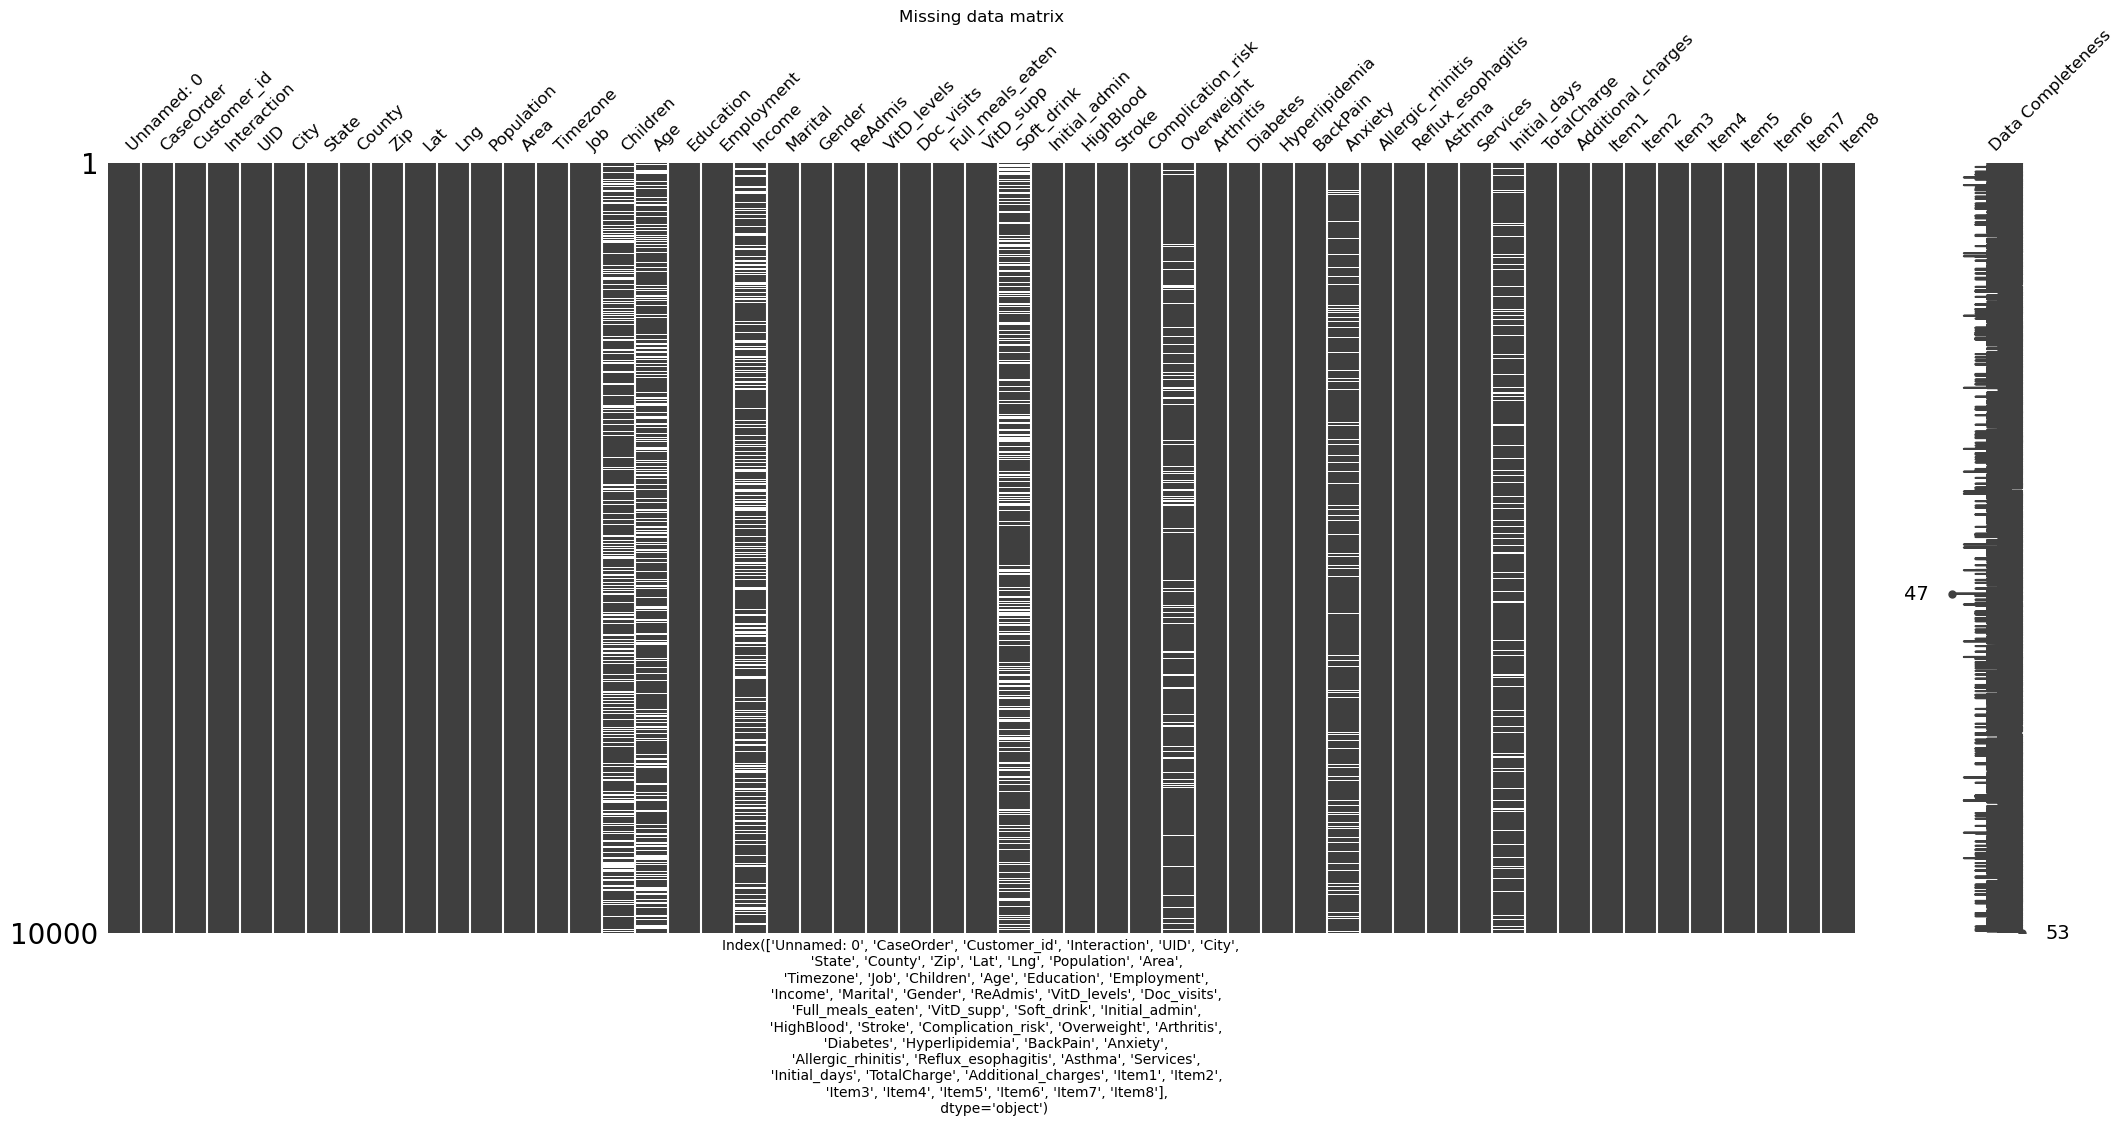

In [138]:
#Detect missing values

#Import the libraries I'll be using
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

#Read in the data file
df = pd.read_csv('medical_raw_data.csv')

#Print a complete list of the percentages and counts of missing data in each column
#Code to calculate percentage: https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
missing_count = df.isnull().sum()
missing_percent = df.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'Missing Count' : missing_count, 'Missing Percent' : missing_percent})
print(missing_df)

#Generate a missing dadta matrix to visualize the problem
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.xlabel(df.columns)
plt.show()

In [140]:
#Clean missing values

#Import the libraries I'll be using
import pandas as pd

#Read in the data file
df = pd.read_csv('medical_raw_data.csv')

#Break our columns with missing values into groups based on how they will be mitigated
numeric_columns = ['Children', 'Income', 'Initial_days']
categorical_columns = ['Soft_drink', 'Overweight', 'Anxiety']

#Examine mean and median for age before imputation
print('++++----Age Before Imputation----++++')
print(f'Mean: {df['Age'].mean()}')
print(f'Median: {df['Age'].median()}')
print('++++--------++++')

#Fill age with mean
df.fillna({'Age' : int(df['Age'].mean())}, inplace = True)

#Examine mean and median for age after imputation
print('++++----Age After Imputation----++++')
print(f'Mean: {df['Age'].mean()}')
print(f'Median: {df['Age'].median()}')
print('++++--------++++')

#Loop through each numeric column and fill with median value
for column in numeric_columns:
    print(f'++++----{column} Before Imputation----++++')
    print(f'Mean: {df[column].mean()}')
    print(f'Median: {df[column].median()}')
    print('++++--------++++')
    #Fill with median value
    df.fillna({column : int(df[column].median())}, inplace = True)
    print(f'++++----{column} After Imputation----++++')
    print(f'Mean: {df[column].mean()}')
    print(f'Median: {df[column].median()}')
    print('++++--------++++')

#Loop through each categorical column and fill with mode value
for column in categorical_columns:
    #Fill with mode
    df.fillna({column : df[column].mode()[0]}, inplace = True)

#Export cleaned file to csv
df.to_csv('medical_cleaned_data.csv')

++++----Age Before Imputation----++++
Mean: 53.29567624571579
Median: 53.0
++++--------++++
++++----Age After Imputation----++++
Mean: 53.2243
Median: 53.0
++++--------++++
++++----Children Before Imputation----++++
Mean: 2.0982191041554237
Median: 1.0
++++--------++++
++++----Children After Imputation----++++
Mean: 1.814
Median: 1.0
++++--------++++
++++----Income Before Imputation----++++
Mean: 40484.4382683121
Median: 33942.28
++++--------++++
++++----Income After Imputation----++++
Mean: 38872.381479
Median: 33942.0
++++--------++++
++++----Initial_days Before Imputation----++++
Mean: 34.432081888043044
Median: 34.44694129
++++--------++++
++++----Initial_days After Imputation----++++
Mean: 34.3864540406657
Median: 34.0
++++--------++++


++++=========Population========++++
Minimum value: 0
Maximum value: 122814
Value range: 122814
Mean Value: 9965.2538
Values with a z-score over 3: 218
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 855
Minimum Outlier Value: 33894
Maximum Outlier Value: 122814
Range of Outlier Values: 88920


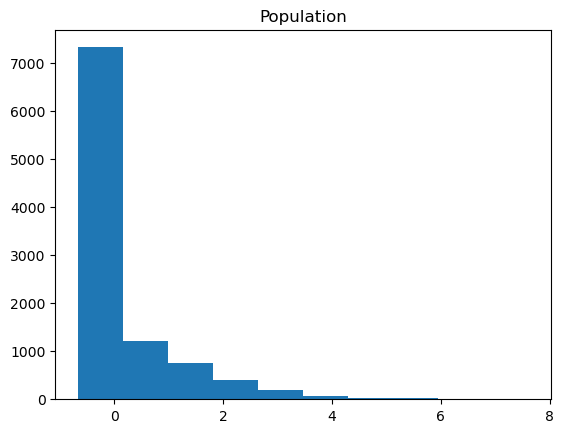

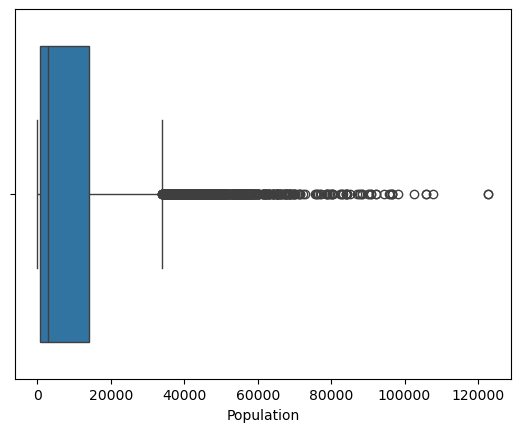

++++=========Children========++++
Minimum value: 0.0
Maximum value: 7.0
Value range: 7.0
Mean Value: 1.581
Values with a z-score over 3: 154
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 1164
Minimum Outlier Value: 4.0
Maximum Outlier Value: 7.0
Range of Outlier Values: 3.0


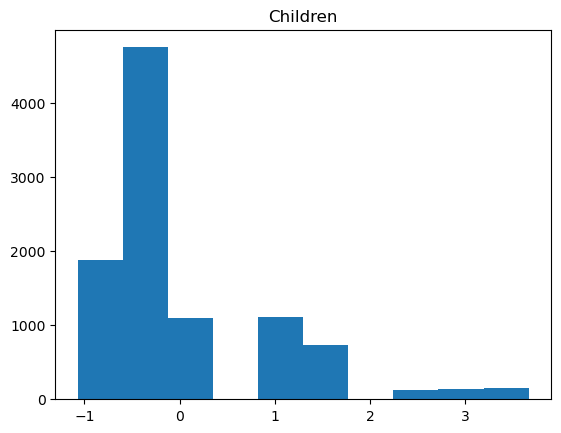

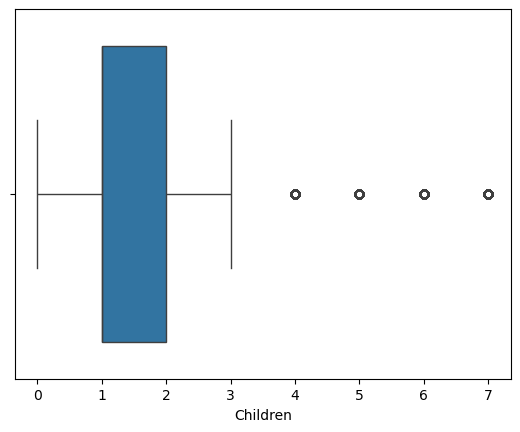

++++=========Age========++++
Minimum value: 18.0
Maximum value: 89.0
Value range: 71.0
Mean Value: 53.2243
Values with a z-score over 3: 0
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 0
Minimum Outlier Value: nan
Maximum Outlier Value: nan
Range of Outlier Values: nan


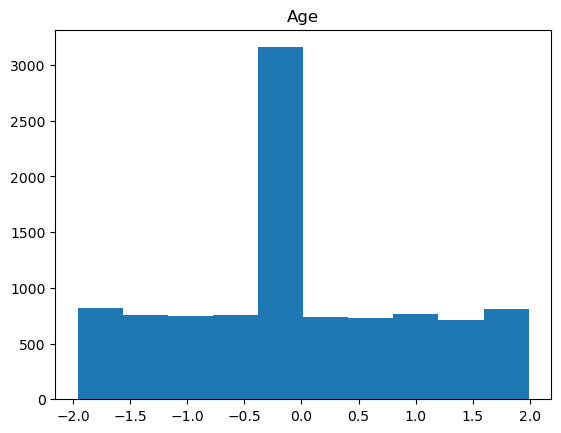

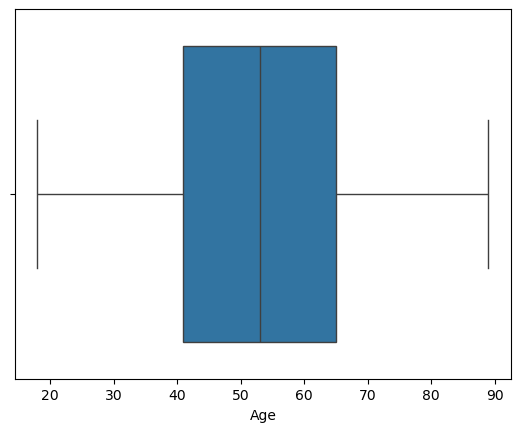

++++=========Income========++++
Minimum value: 154.08
Maximum value: 207249.13
Value range: 207095.05000000002
Mean Value: 38872.381479
Values with a z-score over 3: 180
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 705
Minimum Outlier Value: 80233.66
Maximum Outlier Value: 207249.13
Range of Outlier Values: 127015.47


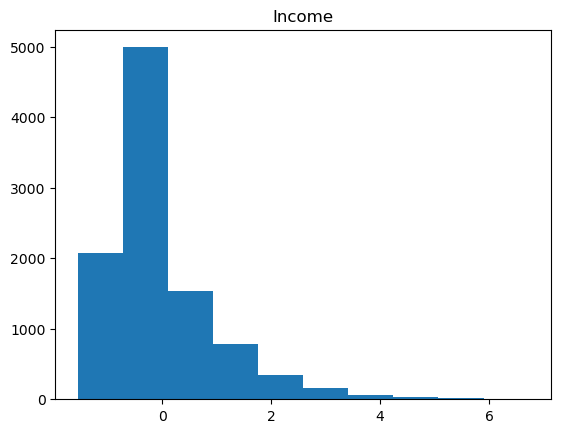

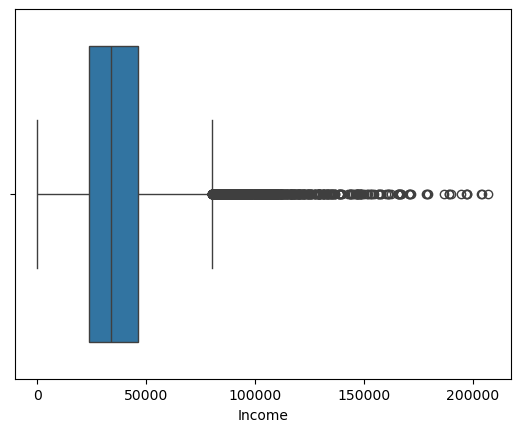

++++=========VitD_levels========++++
Minimum value: 9.519011638
Maximum value: 53.01912416
Value range: 43.500112521999995
Mean Value: 19.412675395613903
Values with a z-score over 3: 500
Values with a z-score under -3: 0
Values below IQR lower threshold: 26
Values above IQR upper threshold: 508
Minimum Outlier Value: 9.519011638
Maximum Outlier Value: 53.01912416
Range of Outlier Values: 43.500112521999995


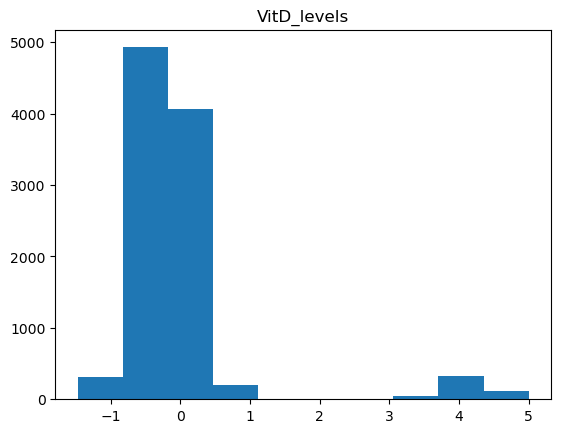

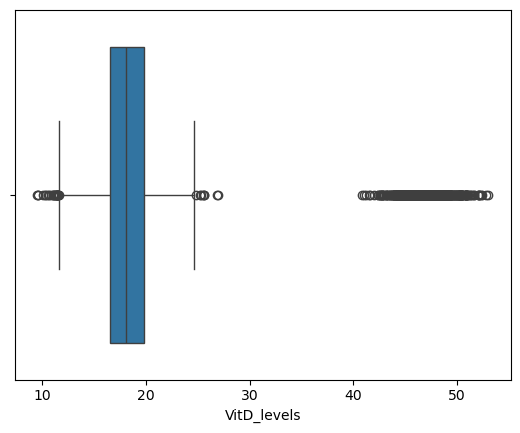

++++=========Doc_visits========++++
Minimum value: 1
Maximum value: 9
Value range: 8
Mean Value: 5.0122
Values with a z-score over 3: 2
Values with a z-score under -3: 6
Values below IQR lower threshold: 0
Values above IQR upper threshold: 0
Minimum Outlier Value: nan
Maximum Outlier Value: nan
Range of Outlier Values: nan


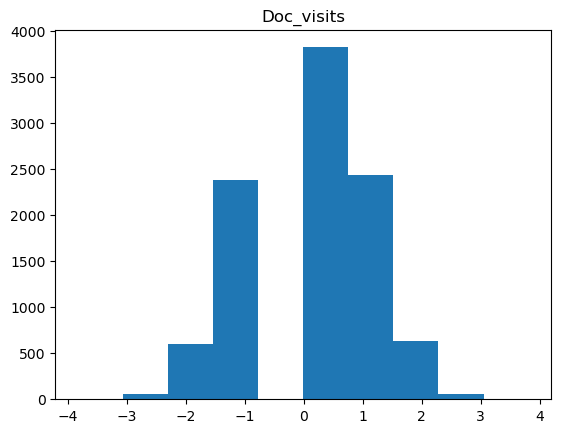

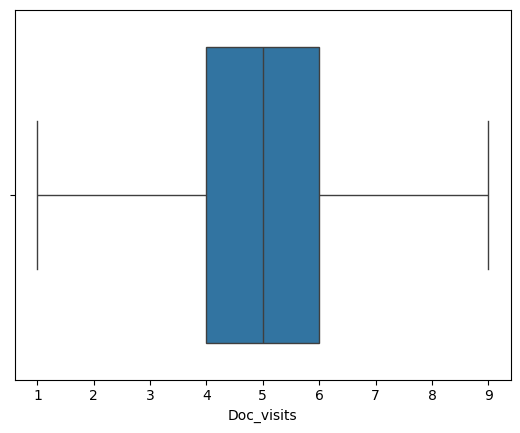

++++=========Full_meals_eaten========++++
Minimum value: 0
Maximum value: 7
Value range: 7
Mean Value: 1.0014
Values with a z-score over 3: 33
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 8
Minimum Outlier Value: 6
Maximum Outlier Value: 7
Range of Outlier Values: 1


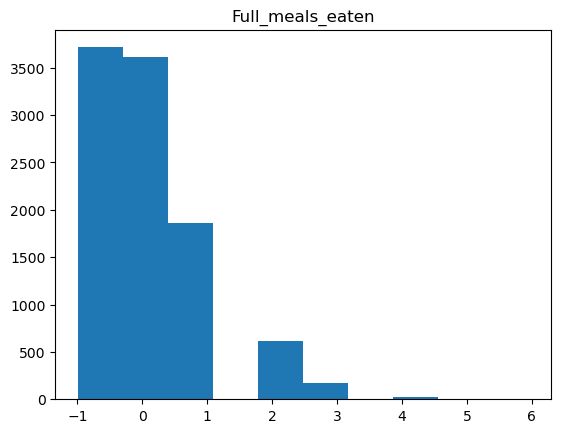

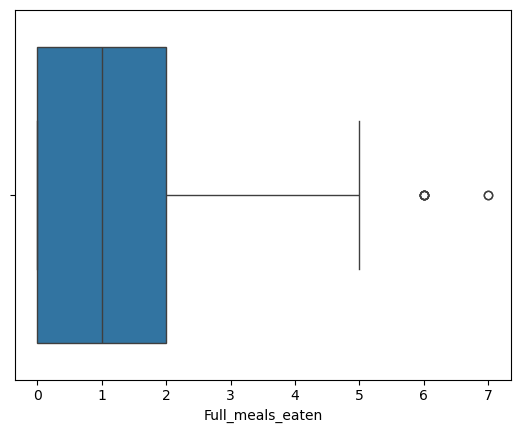

++++=========VitD_supp========++++
Minimum value: 0
Maximum value: 5
Value range: 5
Mean Value: 0.3989
Values with a z-score over 3: 70
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 70
Minimum Outlier Value: 3
Maximum Outlier Value: 5
Range of Outlier Values: 2


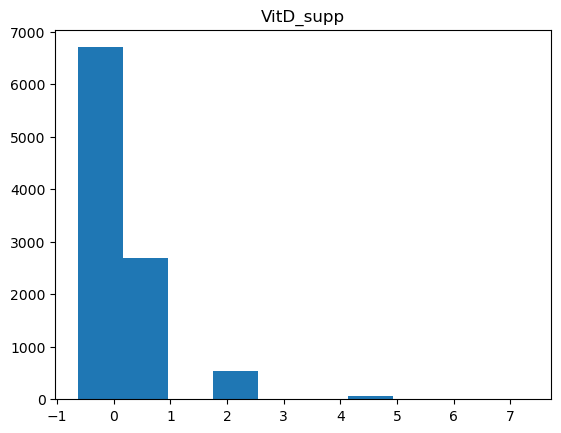

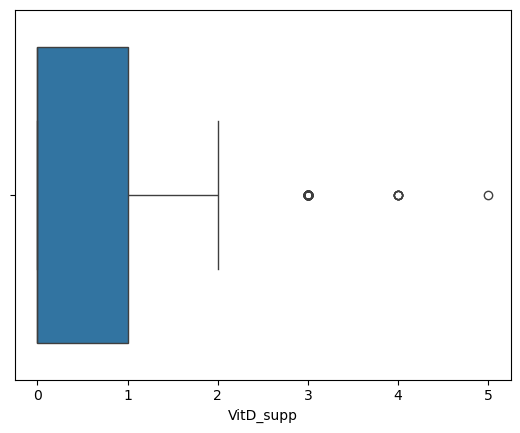

++++=========Initial_days========++++
Minimum value: 1.001980919
Maximum value: 71.9814863
Value range: 70.979505381
Mean Value: 34.3864540406657
Values with a z-score over 3: 0
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 0
Minimum Outlier Value: nan
Maximum Outlier Value: nan
Range of Outlier Values: nan


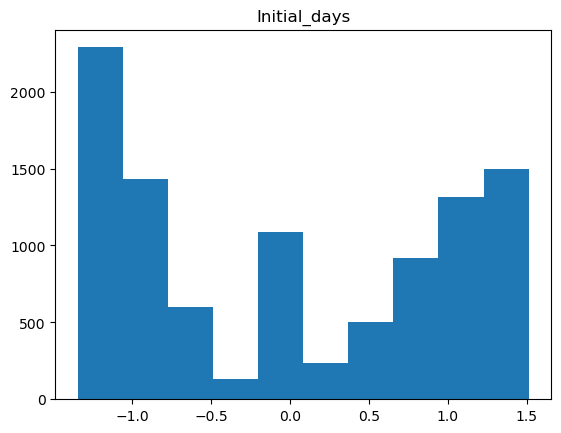

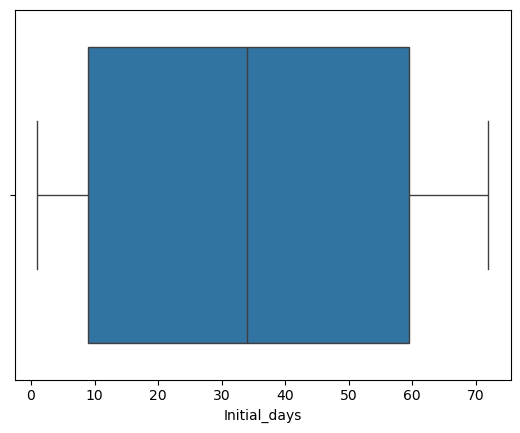

++++=========TotalCharge========++++
Minimum value: 1256.751699
Maximum value: 21524.22421
Value range: 20267.472511
Mean Value: 5891.5382614632
Values with a z-score over 3: 276
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 466
Minimum Outlier Value: 14159.65973
Maximum Outlier Value: 21524.22421
Range of Outlier Values: 7364.564480000001


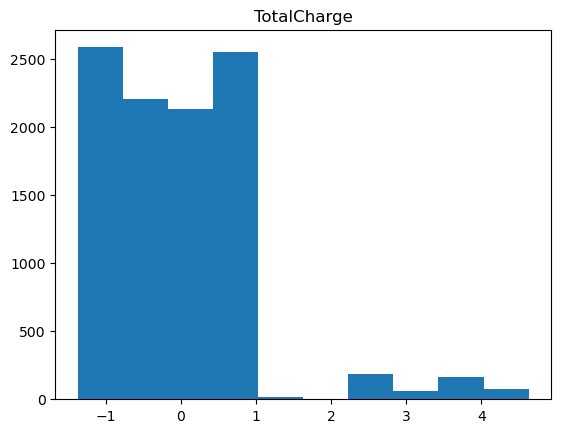

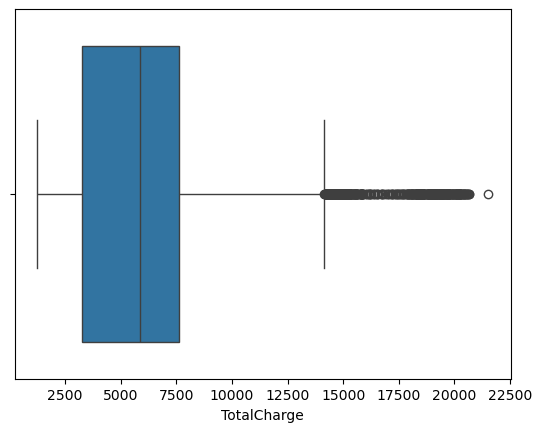

++++=========Additional_charges========++++
Minimum value: 3125.702716
Maximum value: 30566.07313
Value range: 27440.370414
Mean Value: 12934.5285855936
Values with a z-score over 3: 0
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 424
Minimum Outlier Value: 27088.14922
Maximum Outlier Value: 30566.07313
Range of Outlier Values: 3477.9239100000013


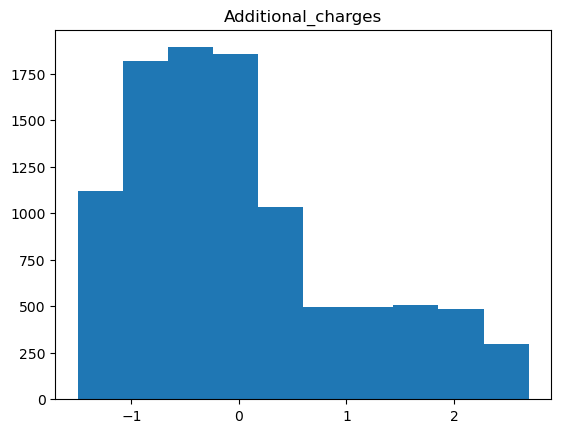

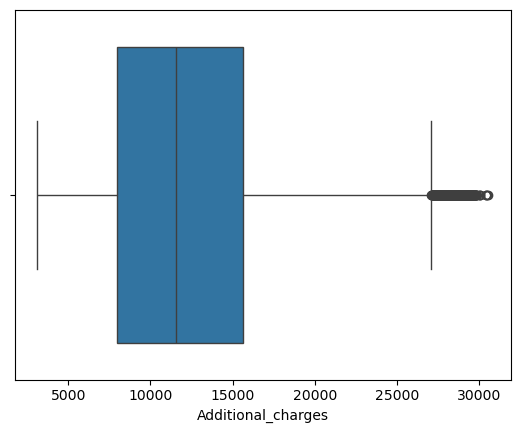

In [150]:
#Detect Outliers

#Import the libraries I'll be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#Read in the data file
df = pd.read_csv('medical_cleaned_data.csv')

#Pool quantitative variables in an array
quantitative_columns = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

#Iterate over quantitative array
for column in quantitative_columns:
    #Generate name for new column based on original column name
    name = 'Z_Score_' + column
    #Calculate z-score and assign its value to fields in new column
    df[name] = stats.zscore(df[column])
    #Print relevant information about values in the set
    print(f'++++========={column}========++++')
    print(f'Minimum value: {df[column].min()}')
    print(f'Maximum value: {df[column].max()}')
    print(f'Value range: {df[column].max() - df[column].min()}')
    print(f'Mean Value: {df[column].mean()}')
    print(f'Values with a z-score over 3: {sum(stats.zscore(df[column]) > 3)}')
    print(f'Values with a z-score under -3: {sum(stats.zscore(df[column]) < -3)}')
    #Calculate quartiles
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    lower_threshold = q1 - 1.5 * stats.iqr(df[column])
    upper_threshold = q3 + 1.5 * stats.iqr(df[column])
    print(f'Values below IQR lower threshold: {(df[column] < lower_threshold).sum()}')
    print(f'Values above IQR upper threshold: {(df[column] > upper_threshold).sum()}')
    outliers = df.query(column + ' < ' + str(lower_threshold) + ' | ' + column + ' > ' + str(upper_threshold))
    print(f'Minimum Outlier Value: {outliers[column].min()}')
    print(f'Maximum Outlier Value: {outliers[column].max()}')
    print(f'Range of Outlier Values: {outliers[column].max() - outliers[column].min()}')
    #Plot the histogram
    plt.hist(df[name])
    plt.title(column)
    plt.show()
    #Plot the boxplots
    boxplot=sns.boxplot(x=column, data=df)
    plt.show()

In [148]:
#Clean Outliers

#Import the libraries I'll be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#Read in the data file
df = pd.read_csv('medical_cleaned_data.csv')

#Define function to remove outliers from related column according to set minimum and maximum accepted values
def remove_outliers(column, minimum_accepted_value, maximum_accepted_value):
    df[column] = np.where(df[column] < minimum_accepted_value, np.nan, df[column])
    df[column] = np.where(df[column] > maximum_accepted_value, np.nan, df[column])
    df.fillna({column : int(df[column].median())}, inplace = True)

remove_outliers('Children', 0, 7)

df.to_csv('medical_cleaned_data.csv')
    

In [156]:
#Import the libraries I'll be using
import pandas as pd

#Read in the data file
df = pd.read_csv('medical_cleaned_data.csv')

#Compose array of columns that will be coded as ordinal
ordinal_columns = ['Education', 'Complication_risk', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'ReAdmis', 'Soft_drink',
                  'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 
                  'Reflux_esophagitis', 'Asthma']

#Loop through columns in ordinal_columns and print the range of values
for column in df[ordinal_columns]:
    print(f'{column} : {df[column].unique()}')

Education : [ 5  6  3  4  9 10  1  2 11  8  7  0]
Complication_risk : [1 2 0]
Item1 : [3 2 4 1 5 7 6 8]
Item2 : [3 4 5 1 2 6 7]
Item3 : [2 3 4 5 1 6 7 8]
Item4 : [2 4 3 5 6 1 7]
Item5 : [4 3 5 2 6 1 7]
Item6 : [3 4 5 2 6 1 7]
Item7 : [3 5 4 2 6 1 7]
Item8 : [4 3 5 6 2 1 7]
ReAdmis : [0 1]
Soft_drink : [0 1]
HighBlood : [1 0]
Stroke : [0 1]
Overweight : [0. 1.]
Arthritis : [1 0]
Diabetes : [1 0]
Hyperlipidemia : [0 1]
BackPain : [1 0]
Anxiety : [1. 0.]
Allergic_rhinitis : [1 0]
Reflux_esophagitis : [0 1]
Asthma : [1 0]


In [154]:
#Import the libraries I'll be using
import pandas as pd

pd.set_option("future.no_silent_downcasting", True)

#Read in the data file
df = pd.read_csv('medical_cleaned_data.csv')

#Separate the dichotomous variables from the rest
dichotomous_columns = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
                  'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

#Create a numeric dictionary for the ordinal Education
dict = {'Education' : {'No Schooling Completed' : 0, 'Nursery School to 8th Grade' : 1, '9th Grade to 12th Grade, No Diploma' : 2,
                              'GED or Alternative Credential' : 3, 'Regular High School Diploma' : 4,
                              'Some College, Less than 1 Year' : 5, 'Some College, 1 or More Years, No Degree' : 6,
                              'Professional School Degree' : 7, "Associate's Degree" : 8, "Bachelor's Degree" : 9, "Master's Degree" : 10,
                              'Doctorate Degree' : 11}}

#Replace values with those from the dictionary
df.replace(dict, inplace=True)

#Create a numeric dictionary for the ordinal Complication_risk
dict = {'Complication_risk' : {'Low' : 0, 'Medium' : 1, 'High' : 2}}

#Replace values with those from the dictionary
df.replace(dict, inplace=True)

#Loop through dichotomous variables and give them a value of 0 for False and 1 for True
for column in dichotomous_columns:
    dict = {column : {'No' : 0, 'Yes' : 1}}
    df.replace(dict, inplace=True)

#output the cleaned file
df.to_csv('medical_cleaned_data.csv')

PCA(n_components=13)
                         PC1       PC2       PC3       PC4       PC5  \
Income             -0.006431 -0.005553  0.044831  0.231205  0.351403   
VitD_levels         0.540036 -0.052496 -0.056867 -0.299146  0.278389   
TotalCharge         0.701946 -0.078146 -0.023375 -0.019051  0.001727   
Additional_charges  0.083558  0.701028  0.001608  0.030573  0.000434   
Lat                -0.021694 -0.007934 -0.714375  0.143073 -0.025457   
Lng                -0.005398  0.017308  0.269484 -0.525099 -0.438038   
Population          0.025505 -0.025444  0.630730  0.234582  0.245436   
Children           -0.000287 -0.011304 -0.002193  0.158477 -0.250239   
Age                 0.082970  0.701059  0.008127  0.018021 -0.025988   
Doc_visits         -0.005388  0.012760  0.014048  0.185194  0.401867   
Full_meals_eaten   -0.009317  0.036268 -0.105367 -0.390089  0.455684   
VitD_supp           0.033960  0.010698  0.031817  0.424594 -0.064666   
Initial_days        0.446437 -0.073839  0.0

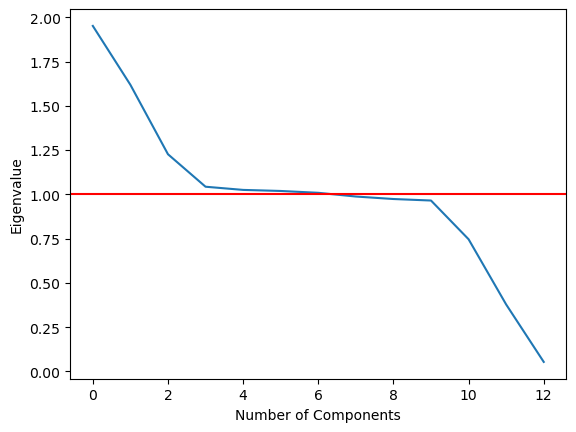

In [8]:
#Import the libraries I'll be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

#Read in medical data
df = pd.read_csv('medical_cleaned_data.csv')

#Define variables in new data frame
variables = df[['Income', 'VitD_levels', 'TotalCharge', 'Additional_charges', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days']]

#Normalize variables
variables_normalized = (continuous_variables - continuous_variables.mean()) / continuous_variables.std()

#Determine and print the number of principle components
pca = PCA(n_components = variables.shape[1])
print(pca)

#Perform PCA
pca.fit(variables_normalized)
continuous_pca = pd.DataFrame(pca.transform(variables_normalized), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])

#Load PCs
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], index = continuous_variables.columns)

#Print loading matrix
print(loadings)

#Calculate eigenvalues
cov_matrix = np.dot(continuous_variables_normalized.T, continuous_variables_normalized) / continuous_variables.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

#Print eigenvalues
print(eigenvalues)

#Plot eigenvalues in a scree plot
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='red')
plt.show()